# Q1 - Non Linear Perceptron

In [7]:
import pandas as pd
import numpy as np
import math
file='/content/drive/MyDrive/2018AAPS1242H_NNFL (Assignment 2)/Data/data55.xlsx'
A=pd.read_excel(file,header=None)
d=np.asarray(A,dtype='float')
np.random.seed(10)
d=np.random.permutation(d)
o=np.zeros((len(d),1))
o[:,0]=d[:,4]

d=np.delete(d,4,1)
x1mean=d[:,0].mean()
x2mean=d[:,1].mean()
x3mean=d[:,2].mean()
x4mean=d[:,3].mean()
x1std=np.std(d[:,0])
x2std=np.std(d[:,1])
x3std=np.std(d[:,2])
x4std=np.std(d[:,3])
#normalising training data
d[:,0]=(d[:,0]-d[:,0].mean())/np.std(d[:,0])
d[:,1]=(d[:,1]-d[:,1].mean())/np.std(d[:,1])
d[:,2]=(d[:,2]-d[:,2].mean())/np.std(d[:,2])
d[:,3]=(d[:,3]-d[:,3].mean())/np.std(d[:,3])
#hold out cross validation
x=d[:70]
v=d[70:80]
t=d[80:]
y=o[:70]
vo=o[70:80]
to=o[80:]

k=100
a=0.5

#initialising w and b with gaussian distribution
w=np.random.normal(0,1,size=(1,4))
b=np.random.normal(0,1,size=(1,1))
h=np.zeros((len(x),1))
lsq=np.zeros((k,1))
def sigmoid(sum):
  h=1/(1+math.exp(-sum))
  return h
def cost(h):
  j=0.5*np.sum(h-y)**2
  return j
for i in range(k):
  for j in range(len(x)):
    sum=np.sum(w@x[j].T)+b
    h[j]=sigmoid(sum)
    if h[j]>0.5:
      yp=1
    elif h[j]<0.5 or h[j]==0.5:
      yp=0
    if y[j]!=yp:
      w+=a*y[j]*x[j]
      b+=a*y[j]
  lsq[i]=cost(h)
c=0
h=np.zeros((len(v),1))
for i in range(len(v)):
  sum=np.sum(w@v[i].T)+b
  h[i]=sigmoid(sum)
  if h[i]>0.5:
      yp=1
  elif h[i]<0.5 or h[i]==0.5:
    yp=0
  if vo[i]==yp:
    c+=1
print("the validation accuracy is",c/len(v))

c=0
sen=0
spe=0
h=np.zeros((len(t),1))
for i in range(len(t)):
  sum=np.sum(w@t[i].T)+b
  h[i]=sigmoid(sum)
  if h[i]>0.5:
      yp=1
  elif h[i]<0.5 or h[i]==0.5:
    yp=0
  if to[i]==yp:
    c+=1
  if yp==1 and to[i]==1:
    sen+=1
  if yp==0 and to[i]==0:
    spe+=1
pos=0
for i in range(len(to)):
  if to[i]==1:
    pos+=1
neg=len(to)-pos
print("the test accuracy is",c/len(t))
print("the sensitivity is",sen/pos)
print("the specivity is",spe/neg)

the validation accuracy is 1.0
the test accuracy is 1.0
the sensitivity is 1.0
the specivity is 1.0


# Q2 - Kernel Perceptron

In [6]:
import pandas as pd
import numpy as np
import math
file='/content/drive/MyDrive/2018AAPS1242H_NNFL (Assignment 2)/Data/data55.xlsx'
A=pd.read_excel(file,header=None)
d=np.asarray(A,dtype='float')
np.random.seed(20)
d=np.random.permutation(d)
o=np.zeros((len(d),1))
o[:,0]=d[:,4]
for i in range(len(o)):
  if o[i]==0:
    o[i]=-1
d=np.delete(d,4,1)
#normalising training data
d=(d-d.min(axis=0))/(d.max(axis=0)-d.min(axis=0))

#hold out cross validation
x=d[:70]
v=d[70:80]
t=d[80:]
y=o[:70]
vo=o[70:80]
to=o[80:]
k=100
a=np.zeros((len(x),1))
def polyker(u,m):
  ker=np.zeros((len(m),len(u)))
  for i in range(len(m)):
    for j in range(len(u)):
      ker[i,j]=(1+np.dot(m[i],u[j]))**3

  return ker

ker=polyker(x,x)

for i in range(k):
  for j in range(len(x)):
    if (np.sum(a*ker))!=0:
      yp=np.sign(np.sum(a*ker)*y[j]) #polynomial kernel
    else:
      yp=-1
    if yp!=y[j]:
      a[j]+=1
c=0
ker1=polyker(v,x)

for i in range(len(v)):
  if np.sum(a*ker1)!=0:
    yp=np.sign(np.sum(a*ker1)*vo[i])
  else:
    yp=-1
  if yp==vo[i]:
    c+=1
print("the validation set accuracy is:",c/len(vo))
c=0
sen=0
spe=0
ker2=polyker(t,x)
for i in range(len(t)):
  
  if np.sum(a*ker2)!=0:
    yp=np.sign(np.sum(a*ker2)*to[i])
  else:
    yp=-1
  if yp==to[i]:
    c+=1
  if yp==1 and to[i]==1:
    sen+=1
  if yp==-1 and to[i]==-1:
    spe+=1
pos=0
for i in range(len(t)):
  if to[i]==1:
    pos+=1
neg=len(to)-pos
print("the test accuracy is",c/len(t))
print("the sensitivity is",sen/pos)
print("the specivity is",spe/neg)

the validation set accuracy is: 1.0
the test accuracy is 1.0
the sensitivity is 1.0
the specivity is 1.0


# Q3 - Multilayer Perceptron

Validation fold :  1
iteration 0 / 5000: loss 0.711279
iteration 100 / 5000: loss 0.124619
iteration 200 / 5000: loss 0.034071
iteration 300 / 5000: loss 0.025180
iteration 400 / 5000: loss 0.013143
iteration 500 / 5000: loss 0.004656
iteration 600 / 5000: loss 0.002899
iteration 700 / 5000: loss 0.002190
iteration 800 / 5000: loss 0.001793
iteration 900 / 5000: loss 0.001315
iteration 1000 / 5000: loss 0.001102
iteration 1100 / 5000: loss 0.000993
iteration 1200 / 5000: loss 0.000747
iteration 1300 / 5000: loss 0.000686
iteration 1400 / 5000: loss 0.000646
iteration 1500 / 5000: loss 0.000486
iteration 1600 / 5000: loss 0.000489
iteration 1700 / 5000: loss 0.000419
iteration 1800 / 5000: loss 0.000367
iteration 1900 / 5000: loss 0.000399
iteration 2000 / 5000: loss 0.000357
iteration 2100 / 5000: loss 0.000359
iteration 2200 / 5000: loss 0.000308
iteration 2300 / 5000: loss 0.000374
iteration 2400 / 5000: loss 0.000266
iteration 2500 / 5000: loss 0.000250
iteration 2600 / 5000: loss 0

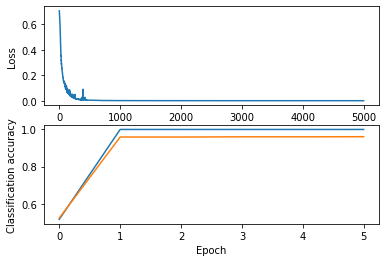

196 0
0 162
accuracy =  1.0 sensitivity =  1.0 specificity =  1.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mat_contents = loadmat('/content/drive/MyDrive/2018AAPS1242H_NNFL (Assignment 2)/Data/data5.mat')
data = mat_contents['x']
np.random.shuffle(data)

def init_data():
    X = np.array(data[:2148, :-1], dtype = float)
    y = np.array(data[:2148, -1], dtype = int)
    X = (X - X.mean(axis = 0))/X.std(axis = 0)
    return X, y

def affine_forward(x, w, b):
    z = x.dot(w) + b
    cache = (x, w, b)
    return z, cache

def relu_forward(x):
    a = x
    a[a<=0] = 0
    cache = x
    return a, cache

def affine_backward(dout, cache):
    x, w, b = cache
    db = np.sum(dout, axis = 0)
    dw = x.T.dot(dout)
    dx = dout.dot(w.T)
    return dx, dw, db

def relu_backward(dout, cache):
    x = cache
    dx = None
    dx = np.ones(x.shape)
    dx[x<=0] = 0
    dx = dx * dout
    return dx

class Twonet(object):

    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, std=1e-4):
        self.W1 = std * np.random.randn(input_size, hidden_size1)
        self.b1 = np.zeros(hidden_size1)
        self.W2 = std * np.random.randn(hidden_size1, hidden_size2)
        self.b2 = np.zeros(hidden_size2)
        self.W3 = std * np.random.randn(hidden_size2, num_classes)
        self.b3 = np.zeros(num_classes)

    def loss(self, X, y = None, reg = 0.0):
        N, D = X.shape
        scores = None
        z1, af_cache1 = affine_forward(X, self.W1, self.b1)
        h1, relu_cache1 = relu_forward(z1)
        z2, af_cache2 = affine_forward(h1, self.W2, self.b2)
        h2, relu_cache2 = relu_forward(z2)
        z3, af_cache3 = affine_forward(h2, self.W3, self.b3)
        scores = z3

        if y is None:
            return scores

        loss = None
        scores -= scores.max()
        scores_exp = np.exp(scores)
        correct_scores = scores[range(N), y]
        correct_scores_exp = np.exp(correct_scores)
        loss = np.sum(-np.log(correct_scores_exp / np.sum(scores_exp, axis = 1))) / N
        loss += 0.5 * reg * (np.sum(self.W1 * self.W1) + \
            np.sum(self.W2 * self.W2) + np.sum(self.W3 * self.W3))

        num = correct_scores_exp
        denom = np.sum(scores_exp, axis = 1)
        mask = (np.exp(z3)/denom.reshape(scores.shape[0],1))
        mask[range(N),y] = -(denom - num)/denom
        mask /= N
        dz3 = mask

        dh2, dw3, db3 = affine_backward(dz3, af_cache3)
        dz2 = relu_backward(dh2, relu_cache2)
        dh1, dw2, db2 = affine_backward(dz2, af_cache2)
        dz1 = relu_backward(dh1, relu_cache1)
        dx, dw1, db1 = affine_backward(dz1, af_cache1)
        
        dw3 = dw3 + reg * self.W3
        dw2 = dw2 + reg * self.W2
        dw1 = dw1 + reg * self.W1

        wgrad = (dw1, dw2, dw3)
        bgrad = (db1, db2, db3)

        return loss, wgrad, bgrad

    def train(self, X, y, X_val, y_val, alpha = 1e-3, alpha_decay = 0.95,\
         reg = 5e-6, num_iters = 100, batch_size = 200):
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in range(num_iters):

            ind = np.random.choice(num_train, batch_size)
            X_batch = X[ind,:]
            y_batch = y[ind]
            
            loss, wgrad, bgrad = self.loss(X_batch, y = y_batch, reg = reg)
            loss_history.append(loss)

            dw1, dw2, dw3 = wgrad
            db1, db2, db3 = bgrad

            self.W1 -= alpha * dw1
            self.W2 -= alpha * dw2
            self.W3 -= alpha * dw3
            self.b1 -= alpha * db1
            self.b2 -= alpha * db2
            self.b3 -= alpha * db3


            if it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))


            if it % iterations_per_epoch == 0:
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                alpha *= alpha_decay


        return {'loss_history' : loss_history, 'train_acc_history' : \
            train_acc_history, 'val_acc_history' : val_acc_history}


    def predict(self, X):
        y_pred = np.argmax(self.loss(X), axis = 1)
        return y_pred



input_size = 72
hidden_size1 = 30
hidden_size2 = 30
num_classes = 2
num_inputs = 1790
std = 0.1
alpha = 0.3
split = 358
batch_size = 1024
reg = 1e-2
num_iters = 5000

X_tot, y_tot = init_data()

train_acc , val_acc = 0, 0
losses = np.empty((5, num_iters))
val_accs = []
train_accs = []

for k in range(5):
    
    X = X_tot[0 : 1790]
    y = y_tot[0 : 1790]
    X_val = X_tot[1790 :]
    y_val = y_tot[1790 :]
    
    Net = Twonet(input_size, hidden_size1, hidden_size2, num_classes, std)
    print("Validation fold : " , k + 1)
    stats = Net.train(X, y, X_val, y_val, num_iters = num_iters,\
         alpha = alpha, batch_size = batch_size, reg = 0.0)
    losses[k] = np.asarray(stats['loss_history'])
    val_accs = np.asarray(stats['val_acc_history'])
    train_accs = np.asarray(stats['train_acc_history'])
    train_acc += train_accs
    val_acc += val_accs


    X_tot[0 : split] = X_val
    X_tot[split : ] = X
    y_tot[0 : split] = y_val
    y_tot[split : ] = y

train_acc /= 5
val_acc /= 5

print(train_acc[-1], val_acc[-1])
loss_hist = np.mean(losses, axis = 0)

plt.subplot(2, 1, 1)
plt.plot(loss_hist)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.tight_layout
plt.show()

y_pred = Net.predict(X_val)
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(len(y_val)):
    if y_pred[i] == 0 and  y_val[i] == 0:
        TN += 1
    elif y_pred[i] == 1 and  y_val[i] == 0:
        FP += 1
    elif y_pred[i] == 0 and  y_val[i] == 1:
        FN += 1
    elif y_pred[i] == 1 and  y_val[i] == 1:
        TP += 1

print(TP, FP)
print(FN, TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("accuracy = ", accuracy, "sensitivity = ", sensitivity,\
     "specificity = ", specificity)